<a href="https://colab.research.google.com/github/Francine-Palacios/RedesNeuronales/blob/main/Regresion/Grados_Celsius_vs_Fahrenheit_con_2_capas_y_3_neuronas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias

In [ ]:
import tensorflow as tf
import numpy as np

Escribimos los datos que vamos a utilizar

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Para este caso usaremos una red neuronal tipo densa, de 2 capas , con 3 neuronas cada una.

In [ ]:
capa= tf.keras.layers.Dense(units=3, input_shape=[1])  # El parametro "units" corresponde a la cantidad de neuronas
                                                        # El parametro "input_shape" corresponde a la cantidad de entradas que daremos, en este caso es solo un numero

oculta1= tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([capa, oculta1, salida])                   # Usaremos un modelo 'Sequential' que se usa para modelos de regresion

Ahora configurameos ciertos aspectos de la compilacion del modelo

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),  #El parametro '0.1' corresponde a que tanto queremos que se corriga la conexion y/o sesgo de la red neuronal al entrenarse
    loss='mean_squared_error'    # Esto quiere decir, que preferimos un monton de errores pequeños, a un error muy grande en alguna prediccion
)

Entrenamos nuestro modelo de redes neuronales con los datos

In [ ]:
Entrenamiento=  modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) # El parametro "epochs" corresponde a la cantidad de epocas / vueltas del entrenamiento
                                                                            # El parametro "verbose=False" es para que no imprima detalles acerca del entrenamiento

Imprimimos el error del entrenamiento segun la epoca o iteracion, que recordemos, elegimos 1000

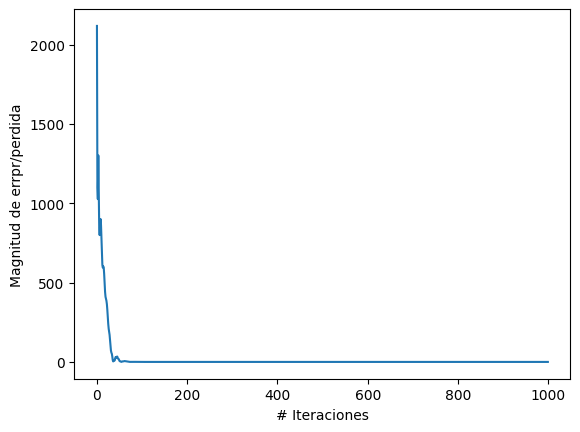

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Iteraciones")
plt.ylabel("Magnitud de errpr/perdida")
plt.plot(Entrenamiento.history["loss"])

Realizaremos una prediccion

In [ ]:
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

1/1 [==============================] - 0s 55ms/step
El resultado es [[211.74744]] fahrenheit!


Veamos las variables internas del modelo de redes nueornales

In [ ]:
print(capa.get_weights())
print(oculta1.get_weights())
print(salida.get_weights())

[array([[0.7813854 , 0.14309387, 0.2212947 ]], dtype=float32), array([ 3.718696 , -1.5035962,  3.6791172], dtype=float32)]
[array([[-0.38516352,  1.1134075 ,  0.48485565],
       [ 0.19141176, -0.8520601 , -0.15673949],
       [ 0.72314894,  1.1361711 , -0.26234666]], dtype=float32), array([3.2108216, 3.5948339, 3.396962 ], dtype=float32)]
[array([[0.7442977 ],
       [1.612578  ],
       [0.90717864]], dtype=float32), array([3.5268292], dtype=float32)]
